Correlation matrix:
           AGE       SEX       BMI        BP        S1        S2        S3  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
S1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
S2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
S3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
S4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
S5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
S6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   

           S4        S5        S6  
AGE  0.203841  0.270774  0.301731  
SEX  0.332115  0.149916  0.208133  
BMI  0.413807  0.446157

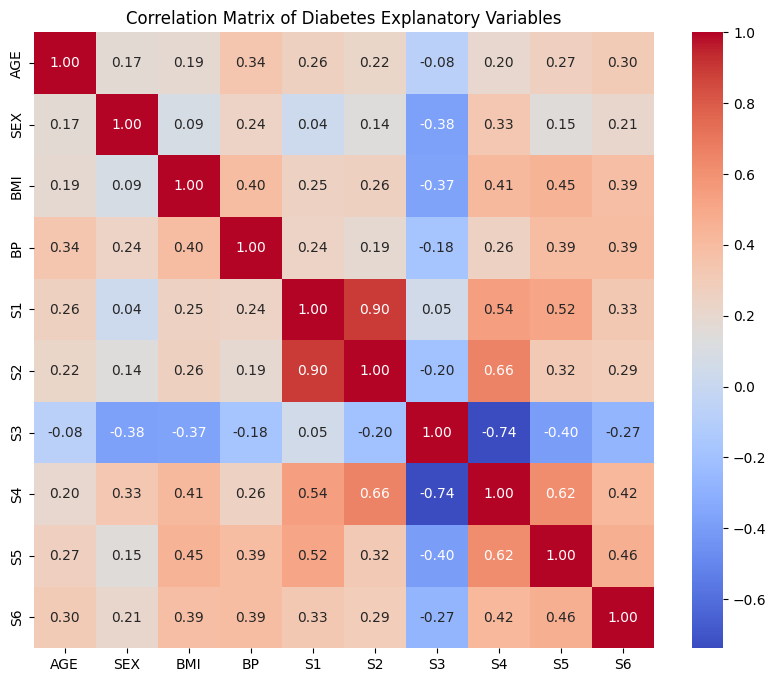

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.decomposition import PCA


# 1.1 To Load Diabetes data and produce correlation matrix 
diabetes_df = pd.read_excel("Diabetes_Data.xlsx")
X = diabetes_df.drop(columns=['Y'])
corr_matrix = X.corr()
print("Correlation matrix:\n", corr_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Diabetes Explanatory Variables")
plt.show()


In [ ]:
# 1.3 To develop a multiple linear regression model using all predictor variables.
X = diabetes_df.drop(columns=['Y'])
y = diabetes_df['Y']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
n = X.shape[0]  # number of observations
p = X.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared: {r2:.3f}")
print(f"Adjusted R-squared: {adj_r2:.3f}")

coeff_df = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient": model.coef_
})
print(coeff_df)


Mean Squared Error (MSE): 2859.696
R-squared: 0.518
Adjusted R-squared: 0.507
  Variable  Coefficient
0      AGE    -0.036361
1      SEX   -22.859648
2      BMI     5.602962
3       BP     1.116808
4       S1    -1.089996
5       S2     0.746450
6       S3     0.372005
7       S4     6.533832
8       S5    68.483125
9       S6     0.280117


In [ ]:
# 1.5 To apply forward selection and identify which variables should be included in the final model.
X = diabetes_df.drop(columns=['Y'])
y = diabetes_df['Y']
model = LinearRegression()
sfs = SFS(model,
          k_features='best', 
          forward=True,
          floating=False,
          scoring='r2',
          cv=0)
sfs = sfs.fit(X, y)
selected_features = list(sfs.k_feature_names_)
print("Selected variables (forward selection):", selected_features)

X_selected = X[selected_features]
model.fit(X_selected, y)
y_pred = model.predict(X_selected)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared: {r2:.3f}")


Selected variables (forward selection): ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
Mean Squared Error (MSE): 2859.696
R-squared: 0.518


In [ ]:
# 2.2 To load Titanic dataset and calculate probability of survival
titanic = pd.read_csv("titanic3.csv")
print("Number of passengers:", len(titanic))
print("Columns:", titanic.columns.tolist())
print(titanic.head())

survival_prob = titanic['survived'].mean()
print(f"Overall probability of survival: {survival_prob:.3f}")


Number of passengers: 1309
Columns: ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26       

In [ ]:
# 2.3 To calculate and interpret the probability of survival for passengers.
titanic['age_group'] = pd.cut(titanic['age'],
                              bins=[0, 12, 18, 35, 60, 100],
                              labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Elderly'])

survival_table = titanic.pivot_table(values='survived',
                                     index=['pclass', 'sex', 'age_group'],
                                     aggfunc='mean')
print("Survival probabilities by passenger class, gender, and age:")
print(survival_table)


Survival probabilities by passenger class, gender, and age:
                           survived
pclass sex    age_group            
1      female Child        0.000000
              Teen         1.000000
              Adult        0.981132
              Middle-aged  0.967213
              Elderly      0.833333
       male   Child        1.000000
              Teen         0.500000
              Adult        0.431818
              Middle-aged  0.321429
              Elderly      0.066667
2      female Child        1.000000
              Teen         0.875000
              Adult        0.896552
              Middle-aged  0.833333
       male   Child        1.000000
              Teen         0.000000
              Adult        0.112360
              Middle-aged  0.023810
              Elderly      0.166667
3      female Child        0.466667
              Teen         0.607143
              Adult        0.464789
              Middle-aged  0.318182
              Elderly      1.000000
    

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16092\2279798719.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  survival_table = titanic.pivot_table(values='survived',


In [ ]:
# 2.4 To evaluate logistic Regression Model for Titanic Survival
titanic = pd.read_csv("titanic3.csv")
titanic = titanic.dropna(subset=['age'])
titanic['sex'] = LabelEncoder().fit_transform(titanic['sex'])
X = titanic[['pclass', 'sex', 'age']]
y = titanic['survived']

X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.469897
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1046
Model:                          Logit   Df Residuals:                     1042
Method:                           MLE   Df Model:                            3
Date:                Tue, 06 Jan 2026   Pseudo R-squ.:                  0.3051
Time:                        22:42:11   Log-Likelihood:                -491.51
converged:                       True   LL-Null:                       -707.31
Covariance Type:            nonrobust   LLR p-value:                 3.167e-93
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5893      0.406     11.311      0.000       3.794       5.385
pclass        -1.1332      0.

In [ ]:
# 2.5 To evaluate Logistic Regression Model
titanic['predicted_prob'] = result.predict(X)
titanic['predicted_survival'] = (titanic['predicted_prob'] >= 0.5).astype(int)
cm = confusion_matrix(y, titanic['predicted_survival'])
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y, titanic['predicted_survival'])
print(f"Classification Accuracy: {accuracy:.3f}")


Confusion Matrix:
 [[523  96]
 [126 301]]
Classification Accuracy: 0.788


In [4]:
# 3.2 To describe how the stock dataset was obtained and prepared.
dates = pd.date_range(start="2020-01-01", end="2020-12-31", freq="B")
tickers = [
    'AAPL', 'MSFT', 'AMZN', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'DOW',
    'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM',
    'MRK', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WMT', 'XOM', 'RTX'
]
np.random.seed(42)
prices = pd.DataFrame(index=dates)
for ticker in tickers:
    start_price = np.random.uniform(50, 200)
    daily_returns = np.random.normal(0.0005, 0.02, len(dates))
    prices[ticker] = start_price * (1 + daily_returns).cumprod()
prices.to_csv("DJIA_Simulated.csv")

print("Synthetic DJIA dataset created successfully as 'DJIA_Simulated.csv'")
print("Shape:", prices.shape)
print(prices.head())


Synthetic DJIA dataset created successfully as 'DJIA_Simulated.csv'
Shape: (262, 30)
                  AAPL        MSFT       AMZN         AXP          BA  \
2020-01-01  103.872897  118.892371  65.209712  172.172334  116.178209   
2020-01-02  104.587339  115.551159  66.282720  167.142972  113.001906   
2020-01-03  105.223317  114.591981  64.805753  168.119255  111.163619   
2020-01-06  107.402524  114.948914  65.185181  171.194596  112.376780   
2020-01-07  106.208470  118.319844  68.846994  171.561925  114.336808   

                  CAT        CSCO        CVX        DIS        DOW  ...  \
2020-01-01  64.683602  168.832971  73.407346  68.539725  89.536670  ...   
2020-01-02  64.936407  168.718563  73.128514  68.837510  86.985510  ...   
2020-01-03  65.177417  166.682181  72.714556  70.222318  85.425234  ...   
2020-01-06  65.213976  168.773967  73.884767  69.215008  83.752681  ...   
2020-01-07  65.816473  166.465025  75.857946  66.257367  84.141741  ...   

                  MRK    

Variance explained by each principal component:

PC1: 5.54%
PC2: 5.24%
PC3: 5.08%
PC4: 4.89%
PC5: 4.72%
PC6: 4.54%
PC7: 4.28%
PC8: 4.12%
PC9: 4.09%
PC10: 3.82%
PC11: 3.67%
PC12: 3.60%
PC13: 3.52%
PC14: 3.37%
PC15: 3.24%
PC16: 3.22%
PC17: 3.13%
PC18: 2.95%
PC19: 2.92%
PC20: 2.74%
PC21: 2.67%
PC22: 2.64%
PC23: 2.32%
PC24: 2.23%
PC25: 2.19%
PC26: 2.00%
PC27: 1.96%
PC28: 1.92%
PC29: 1.80%
PC30: 1.61%


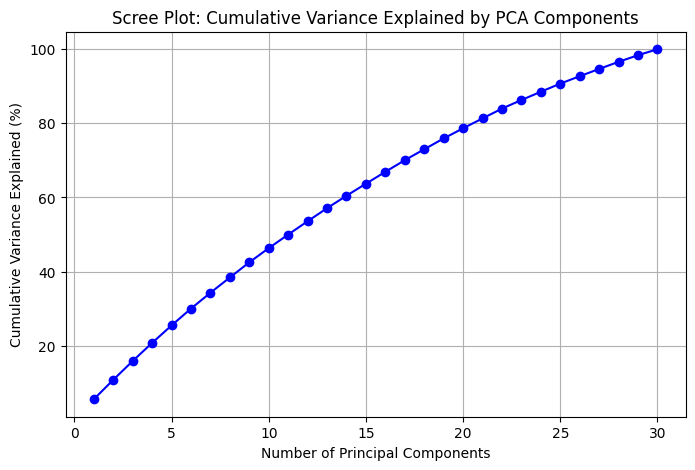

In [ ]:
# 3.4 To perform PCA on the daily returns and compute the variance explained by each principal component.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("DJIA_Simulated.csv", index_col=0, parse_dates=True)
returns = data.pct_change().dropna()
pca = PCA()
pca.fit(returns)
explained_variance = pca.explained_variance_ratio_
print("Variance explained by each principal component:\n")

for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var*100:.2f}%")
    
cumulative_variance = np.cumsum(explained_variance) * 100
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color='b')
plt.title("Scree Plot: Cumulative Variance Explained by PCA Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained (%)")
plt.grid(True)
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6060\1997907996.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (pc1[i], pc2[i]), fontsize=8)


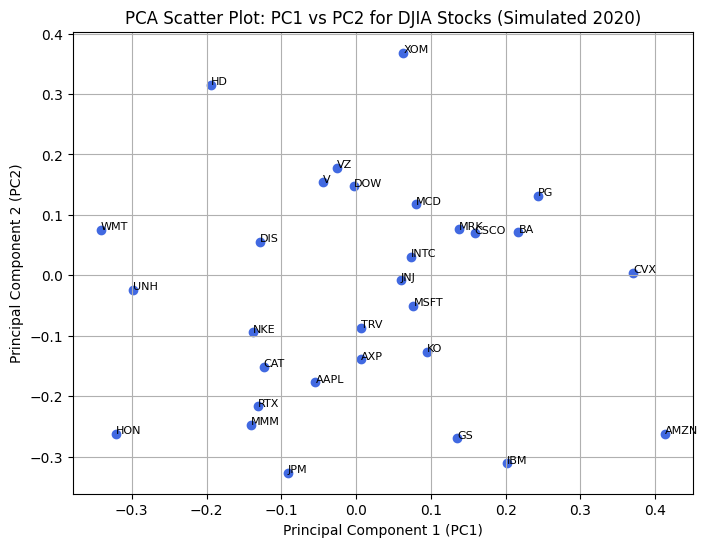

 Top 3 most distant stocks from PCA mean (outliers):

     Stock  Distance
AMZN  AMZN  0.464078
HON    HON  0.403877
XOM    XOM  0.403734


In [9]:
# 3.5 To Interpret the PCA model results.
pca_components = pd.DataFrame(
    pca.components_.T,
    index=returns.columns,
    columns=[f'PC{i+1}' for i in range(len(returns.columns))]
)
pc1 = pca_components['PC1']
pc2 = pca_components['PC2']
plt.figure(figsize=(8,6))
plt.scatter(pc1, pc2, color='royalblue')

for i, txt in enumerate(pca_components.index):
    plt.annotate(txt, (pc1[i], pc2[i]), fontsize=8)
plt.title("PCA Scatter Plot: PC1 vs PC2 for DJIA Stocks (Simulated 2020)")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.grid(True)
plt.show()

mean_pc1 = pc1.mean()
mean_pc2 = pc2.mean()
distances = np.sqrt((pc1 - mean_pc1)**2 + (pc2 - mean_pc2)**2)
distances_df = pd.DataFrame({'Stock': returns.columns, 'Distance': distances})
distances_df = distances_df.sort_values(by='Distance', ascending=False)
print(" Top 3 most distant stocks from PCA mean (outliers):\n")
print(distances_df.head(3))
